<a href="https://colab.research.google.com/github/jyotirangu/DataScience/blob/main/12_Pandas/1_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### What is Pandas

Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

https://pandas.pydata.org/about/index.html

### Pandas Series

A Pandas Series is like a column in a table. It is a 1-D array holding data of any type.

In [131]:
# Importing Pandas
import numpy as np
import pandas as pd

### Series from lists

In [132]:
# string
country = ['India', 'Pakistan', 'USA', 'Nepal', 'Srilanka']
pd.Series(country)

,0
0,India
1,Pakistan
2,USA
3,Nepal
4,Srilanka


In above code's output dtype:object is given which means it is a string in most cases

In [133]:
# integer
runs = [14,25,4,2,100]

run_series  = pd.Series(runs)
run_series

,0
0,14
1,25
2,4
3,2
4,100


In [134]:
# custom index
marks = [94, 90, 99, 100]
subjects = ['maths', 'english', 'science', 'hindi']

pd.Series(marks, index=subjects)

,0
maths,94
english,90
science,99
hindi,100


In [135]:
# setting a name
marks = pd.Series(marks, index=subjects,name="Jyoti's marks")
marks

,Jyoti's marks
maths,94
english,90
science,99
hindi,100


### Series from dict

In [136]:
marks = {
    'maths' : 94,
    'english' : 90,
    'science' : 99,
    'hindi' : 100
}

marks_series = pd.Series(marks,name="Jyoti's Marks")
marks_series

,Jyoti's Marks
maths,94
english,90
science,99
hindi,100


### Series Attributes

Size is the attribute of the Series Class in Pandas which tells the size (no. of subjects in case of marks_series object) of the series object

In [137]:
# size
marks_series.size

4

In [138]:
# name
marks_series.name

"Jyoti's Marks"

In [139]:
# is_unique
marks_series.is_unique

True

In [140]:
pd.Series([1,1,1,2,3,4,5]).is_unique

False

In [141]:
# index
marks_series.index

Index(['maths', 'english', 'science', 'hindi'], dtype='object')

In [142]:
run_series.index

RangeIndex(start=0, stop=5, step=1)

In [143]:
type(run_series.index)

pandas.core.indexes.range.RangeIndex

In [144]:
# values
marks_series.values

array([ 94,  90,  99, 100])

The output we get is the numpy array, you can check it using type()

In [145]:
type(marks_series.values)

numpy.ndarray

### Series using read_csv

In [146]:
# with one col
pd.read_csv('/content/subs.csv')

,Subscribers gained
0,48
1,57
2,40
3,43
4,44
...,...
360,231
361,226
362,155
363,144


The above output you get is not a series, but a dataframe, the default mechanism of the csv_read() function is dataframe, whenever it reads the csv file, it's in dataframe. HOwever if you want it in series, you have to explicitly convert it.

In [147]:
type(pd.read_csv('/content/subs.csv'))

pandas.core.frame.DataFrame

In [148]:
sub = pd.read_csv('/content/subs.csv'). squeeze('columns')
sub

,Subscribers gained
0,48
1,57
2,40
3,43
4,44
...,...
360,231
361,226
362,155
363,144


In [149]:
type(sub)

pandas.core.series.Series

In [150]:
# with 2 cols
vk = pd.read_csv('/content/kohli_ipl.csv',index_col='match_no').squeeze('columns')
vk

,runs
match_no,
1,1
2,23
3,13
4,12
5,1
...,...
211,0
212,20
213,73


In [151]:
movies = pd.read_csv('/content/bollywood.csv',index_col='movie').squeeze('columns')
movies


,lead
movie,
Uri: The Surgical Strike,Vicky Kaushal
Battalion 609,Vicky Ahuja
The Accidental Prime Minister (film),Anupam Kher
Why Cheat India,Emraan Hashmi
Evening Shadows,Mona Ambegaonkar
...,...
Hum Tumhare Hain Sanam,Shah Rukh Khan
Aankhen (2002 film),Amitabh Bachchan
Saathiya (film),Vivek Oberoi


### Series methods

In [152]:
# head and tail
sub.head()

,Subscribers gained
0,48
1,57
2,40
3,43
4,44


In [153]:
vk.head(3)

,runs
match_no,
1,1
2,23
3,13


In [154]:
vk.tail()

,runs
match_no,
211,0
212,20
213,73
214,25
215,7


In [155]:
vk.tail(10)

,runs
match_no,
206,0
207,0
208,9
209,58
210,30
211,0
212,20
213,73
214,25


In [156]:
# sample returns one row randomly
movies.sample()

,lead
movie,
Bumper Draw,Seema Azmi


In [157]:
movies.sample(5)

,lead
movie,
Hindi Medium,Irrfan Khan
Bang Bang!,Hrithik Roshan
Chand Sa Roshan Chehra,Samir Aftab
Mujhse Fraaandship Karoge,Saqib Saleem
Haunted – 3D,Mimoh Chakraborty


In [158]:
# value_counts -> movies
movies.value_counts()
# it gives the frequency of each value in the series

,count
lead,
Akshay Kumar,48
Amitabh Bachchan,45
Ajay Devgn,38
Salman Khan,31
Sanjay Dutt,26
...,...
Seema Azmi,1
Akanksha Puri,1
Charanpreet Insan,1


In [159]:
# sort_values => inplace
vk.sort_values()

,runs
match_no,
8,0
87,0
93,0
91,0
206,0
...,...
164,100
120,100
123,108


In [160]:
vk.sort_values(ascending=False).head(1).values[0]

np.int64(113)

In [161]:
# sort_index -> inplace -> movies
movies.sort_index(ascending=False)

,lead
movie,
Zor Lagaa Ke...Haiya!,Meghan Jadhav
Zokkomon,Darsheel Safary
Zindagi Tere Naam,Mithun Chakraborty
Zindagi Na Milegi Dobara,Hrithik Roshan
Zindagi 50-50,Veena Malik
...,...
2 States (2014 film),Arjun Kapoor
1971 (2007 film),Manoj Bajpayee
1920: The Evil Returns,Vicky Ahuja


### Series Maths Methods

size function counts the no. of data whereas count function counts the no. of non-null data

In [162]:
# count

vk.count()

np.int64(215)

In [163]:
# sum -> product
sub

,Subscribers gained
0,48
1,57
2,40
3,43
4,44
...,...
360,231
361,226
362,155
363,144


In [164]:
sub.sum()

np.int64(49510)

In [165]:
sub.prod()
# the answer is 0 because on someday It may have get no subcriber

np.int64(0)

In [166]:
# mean -> median -> mode -> std -> var
sub.mean()

np.float64(135.64383561643837)

In [167]:
vk.median()

24.0

In [168]:
movies.mode()

,lead
0,Akshay Kumar


In [169]:
sub.std()

62.67502303725269

In [170]:
vk.var()

688.0024777222344

In [171]:
# min/max
sub.min()

33

In [172]:
sub.max()

396

In [173]:
# describe
vk.describe()

,runs
count,215.000000
mean,30.855814
std,26.229801
min,0.000000
25%,9.000000
50%,24.000000
75%,48.000000
max,113.000000


### Series Indexing

In [174]:
# integer indexing
x = pd.Series([12,23,1,4,25,45,12,6,78,56,28,48])
x[1]

np.int64(23)

In [175]:
# negative indexing
x[-1]
# Negative indexing doen't work here

KeyError: -1

In [233]:
movies

,lead
movie,
Uri: The Surgical Strike,Vicky Kaushal
Battalion 609,Vicky Ahuja
The Accidental Prime Minister (film),Anupam Kher
Why Cheat India,Emraan Hashmi
Evening Shadows,Mona Ambegaonkar
...,...
Hum Tumhare Hain Sanam,Shah Rukh Khan
Aankhen (2002 film),Amitabh Bachchan
Saathiya (film),Vivek Oberoi


In [234]:
movies[0]

/tmp/ipython-input-234-3901301928.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  movies[0]


'Vicky Kaushal'

In [235]:
# positive slicing
vk[5:16]

,runs
match_no,
6,9
7,34
8,0
9,21
10,3
11,10
12,38
13,3
14,11


In [236]:
# negative slicing
vk[-5:]


,runs
match_no,
211,0
212,20
213,73
214,25
215,7


In [237]:
movies[::-2]

,lead
movie,
Awara Paagal Deewana,Akshay Kumar
Saathiya (film),Vivek Oberoi
Hum Tumhare Hain Sanam,Shah Rukh Khan
Devdas (2002 Hindi film),Shah Rukh Khan
Zameen (2003 film),Ajay Devgn
...,...
Thackeray (film),Nawazuddin Siddiqui
Bombairiya,Radhika Apte
Soni (film),Geetika Vidya Ohlyan


In [238]:
# fancy indexing
vk[[1,3,6,7]]

,runs
match_no,
1,1
3,13
6,9
7,34


In [239]:
movies

,lead
movie,
Uri: The Surgical Strike,Vicky Kaushal
Battalion 609,Vicky Ahuja
The Accidental Prime Minister (film),Anupam Kher
Why Cheat India,Emraan Hashmi
Evening Shadows,Mona Ambegaonkar
...,...
Hum Tumhare Hain Sanam,Shah Rukh Khan
Aankhen (2002 film),Amitabh Bachchan
Saathiya (film),Vivek Oberoi


In [ ]:
# indexing with labels -> indexing
movies['2 States (2014 film)']

### Editing Series

In [240]:
# using indexing
marks_series

,Jyoti's Marks
maths,94
english,90
science,99
hindi,100


In [241]:
marks_series[1] = 100
marks_series

/tmp/ipython-input-241-3660931059.py:1: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  marks_series[1] = 100


,Jyoti's Marks
maths,94
english,100
science,99
hindi,100


In [242]:
# what if an index does not exist
marks_series['sst'] = 50

In [243]:
marks_series

,Jyoti's Marks
maths,94
english,100
science,99
hindi,100
sst,50


In [244]:
# slicing
runs

[14, 25, 4, 2, 100]

In [245]:
runs[2:4] = [100,200]
runs

[14, 25, 100, 200, 100]

In [246]:
run_series

,0
0,14
1,25
2,4
3,2
4,100


In [247]:
# fancy indexing
run_series[[0, 3]] = [0, 0]
print(runs)

[14, 25, 100, 200, 100]


In [248]:
# using index label
movies

,lead
movie,
Uri: The Surgical Strike,Vicky Kaushal
Battalion 609,Vicky Ahuja
The Accidental Prime Minister (film),Anupam Kher
Why Cheat India,Emraan Hashmi
Evening Shadows,Mona Ambegaonkar
...,...
Hum Tumhare Hain Sanam,Shah Rukh Khan
Aankhen (2002 film),Amitabh Bachchan
Saathiya (film),Vivek Oberoi


In [249]:
movies['Hum Tumhare Hain Sanam'] = 'Sushmita sen'
movies

,lead
movie,
Uri: The Surgical Strike,Vicky Kaushal
Battalion 609,Vicky Ahuja
The Accidental Prime Minister (film),Anupam Kher
Why Cheat India,Emraan Hashmi
Evening Shadows,Mona Ambegaonkar
...,...
Hum Tumhare Hain Sanam,Sushmita sen
Aankhen (2002 film),Amitabh Bachchan
Saathiya (film),Vivek Oberoi


### Series with Python Functionalities

In [176]:
# len/type/dir/sorted/max/min
print(len(sub))
print(type(sub))
print(dir(sub))
print(sorted(sub))
print(min(sub))
print(max(sub))

365
<class 'pandas.core.series.Series'>
['T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__bool__', '__class__', '__column_consortium_standard__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pandas_priority__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce

In [177]:
# type conversion
list(marks_series)

[94, 90, 99, 100]

In [178]:
dict(marks_series)

{'maths': np.int64(94),
 'english': np.int64(90),
 'science': np.int64(99),
 'hindi': np.int64(100)}

In [179]:
# membership operator

movies

,lead
movie,
Uri: The Surgical Strike,Vicky Kaushal
Battalion 609,Vicky Ahuja
The Accidental Prime Minister (film),Anupam Kher
Why Cheat India,Emraan Hashmi
Evening Shadows,Mona Ambegaonkar
...,...
Hum Tumhare Hain Sanam,Shah Rukh Khan
Aankhen (2002 film),Amitabh Bachchan
Saathiya (film),Vivek Oberoi


In [180]:
'The Accidental Prime Minister (film)' in movies
# the membership operator that is the 'in' operator by default works on index not values

True

In [181]:
'Alia Bhatt' in movies
# it doesn't work, it is showing false,however it should be true.

False

In [182]:
'Alia Bhatt' in movies.values
# Now the answer is true, using .values we can achieve the "in" operation

True

In [183]:
# looping
# by default the looping works on values not index
for i in movies:
  print(i)

Vicky Kaushal
Vicky Ahuja
Anupam Kher
Emraan Hashmi
Mona Ambegaonkar
Geetika Vidya Ohlyan
Arshad Warsi
Radhika Apte
Kangana Ranaut
Nawazuddin Siddiqui
Ali Asgar
Ranveer Singh
Prit Kamani
Ajay Devgn
Sushant Singh Rajput
Amitabh Bachchan
Abhimanyu Dasani
Talha Arshad Reshi
Nawazuddin Siddiqui
Garima Agarwal
Rasika Agashe
Barun Sobti
Akshay Kumar
Zaheer Iqbal
Vidyut Jammwal
Deepika Amin
Manav Kaul
Naseeruddin Shah
Varun Dhawan
Shreyas Talpade
Tiger Shroff
Boman Irani
Ajay Devgn
Arjun Kapoor
Gavie Chahal
Prabhu Deva
Shahid Kapoor
Ayushmann Khurrana
Anupam Kher
Karanvir Bohra
Hrithik Roshan
Jimmy Sheirgill
John Abraham
Rishi Kapoor
Kangana Ranaut
Natalia Janoszek
Diljit Dosanjh
Sidharth Malhotra
Rajeev Khandelwal
Zaira Wasim
Akshay Kumar
Jacqueline Fernandez
Ayushmann Khurrana
Akshaye Khanna
Sonam Kapoor
Karan Deol
Sanjay Dutt
Bhavesh Kumar
Sanaya Irani
Ayushmann Khurrana
Siddhanth Kapoor
Akshay Kumar
Taapsee Pannu
Rajkummar Rao
Sunny Singh Nijjar
Neil Nitin Mukesh
Suraj Pancholi
Boman Iran

In [184]:
# if you want to run a loop on index you can do as follows

for i in movies.index:
  print(i)

Uri: The Surgical Strike
Battalion 609
The Accidental Prime Minister (film)
Why Cheat India
Evening Shadows
Soni (film)
Fraud Saiyaan
Bombairiya
Manikarnika: The Queen of Jhansi
Thackeray (film)
Amavas
Gully Boy
Hum Chaar
Total Dhamaal
Sonchiriya
Badla (2019 film)
Mard Ko Dard Nahi Hota
Hamid (film)
Photograph (film)
Risknamaa
Mere Pyare Prime Minister
22 Yards
Kesari (film)
Notebook (2019 film)
Junglee (2019 film)
Gone Kesh
Albert Pinto Ko Gussa Kyun Aata Hai?
The Tashkent Files
Kalank
Setters (film)
Student of the Year 2
PM Narendra Modi
De De Pyaar De
India's Most Wanted (film)
Yeh Hai India
Khamoshi (2019 film)
Kabir Singh
Article 15 (film)
One Day: Justice Delivered
Hume Tumse Pyaar Kitna
Super 30 (film)
Family of Thakurganj
Batla House
Jhootha Kahin Ka
Judgementall Hai Kya
Chicken Curry Law
Arjun Patiala
Jabariya Jodi
Pranaam
The Sky Is Pink
Mission Mangal
Saaho
Dream Girl (2019 film)
Section 375
The Zoya Factor (film)
Pal Pal Dil Ke Paas
Prassthanam
P Se Pyaar F Se Faraar
Ghost 

In [185]:
# Arithmetic Operators(Broadcasting)
marks_series

,Jyoti's Marks
maths,94
english,90
science,99
hindi,100


In [186]:
100 - marks_series

,Jyoti's Marks
maths,6
english,10
science,1
hindi,0


In [187]:
100 + marks_series

,Jyoti's Marks
maths,194
english,190
science,199
hindi,200


In [188]:
# Relational Operators

vk

,runs
match_no,
1,1
2,23
3,13
4,12
5,1
...,...
211,0
212,20
213,73


In [189]:
vk >= 50

,runs
match_no,
1,False
2,False
3,False
4,False
5,False
...,...
211,False
212,False
213,True


### Boolean Indexing on Series

In [190]:
# Find no. of 50's and 100's scored by Kohli
vk >= 50

,runs
match_no,
1,False
2,False
3,False
4,False
5,False
...,...
211,False
212,False
213,True


In [191]:
vk[vk > 50]

,runs
match_no,
34,58
41,71
44,56
45,67
52,70
57,57
68,73
71,51
73,58


In [192]:
vk[vk >= 50].size

50

In [193]:
# Find number of ducks
vk[vk == 0].size

9

In [194]:
# Count number of day when I had more than 200 subs a day
sub

,Subscribers gained
0,48
1,57
2,40
3,43
4,44
...,...
360,231
361,226
362,155
363,144


In [195]:
sub[sub > 200].size

59

In [196]:
# Find actors who have done more than 20 movies
movies

,lead
movie,
Uri: The Surgical Strike,Vicky Kaushal
Battalion 609,Vicky Ahuja
The Accidental Prime Minister (film),Anupam Kher
Why Cheat India,Emraan Hashmi
Evening Shadows,Mona Ambegaonkar
...,...
Hum Tumhare Hain Sanam,Shah Rukh Khan
Aankhen (2002 film),Amitabh Bachchan
Saathiya (film),Vivek Oberoi


In [197]:
num_movies = movies.value_counts()
num_movies

,count
lead,
Akshay Kumar,48
Amitabh Bachchan,45
Ajay Devgn,38
Salman Khan,31
Sanjay Dutt,26
...,...
Seema Azmi,1
Akanksha Puri,1
Charanpreet Insan,1


In [198]:
num_movies > 20

,count
lead,
Akshay Kumar,True
Amitabh Bachchan,True
Ajay Devgn,True
Salman Khan,True
Sanjay Dutt,True
...,...
Seema Azmi,False
Akanksha Puri,False
Charanpreet Insan,False


In [199]:
num_movies[num_movies > 20]

,count
lead,
Akshay Kumar,48
Amitabh Bachchan,45
Ajay Devgn,38
Salman Khan,31
Sanjay Dutt,26
Shah Rukh Khan,22
Emraan Hashmi,21


### Plotting Graphs on Series

<Axes: >

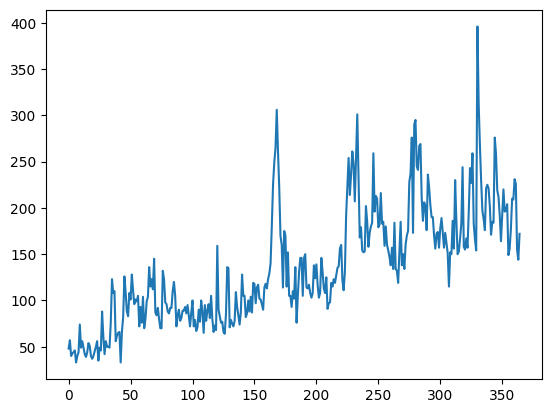

In [200]:
sub.plot()

In [201]:
movies.value_counts().head(20)

,count
lead,
Akshay Kumar,48
Amitabh Bachchan,45
Ajay Devgn,38
Salman Khan,31
Sanjay Dutt,26
Shah Rukh Khan,22
Emraan Hashmi,21
Saif Ali Khan,18
John Abraham,18


<Axes: xlabel='lead'>

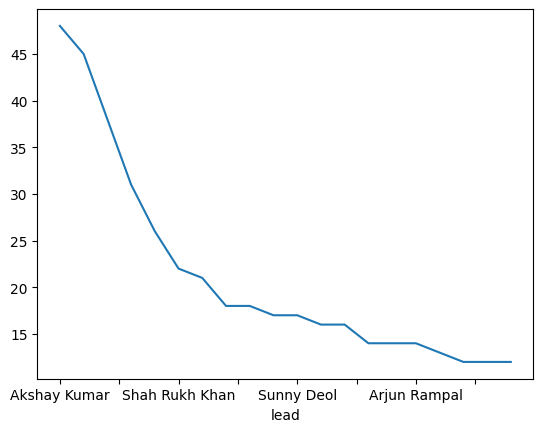

In [202]:
movies.value_counts().head(20).plot()

<Axes: xlabel='lead'>

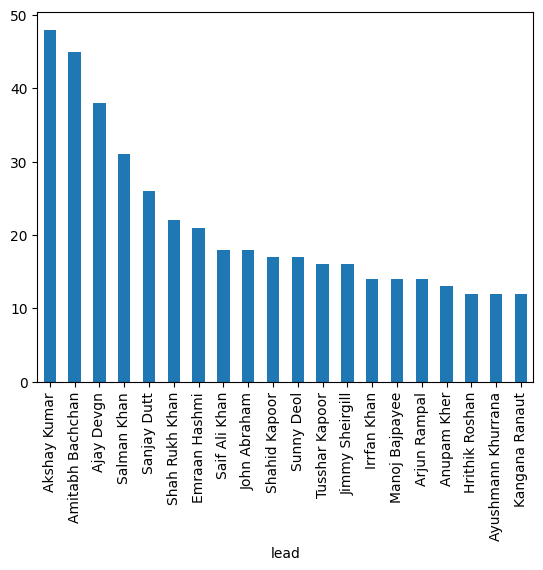

In [203]:
movies.value_counts().head(20).plot(kind='bar')

<Axes: ylabel='count'>

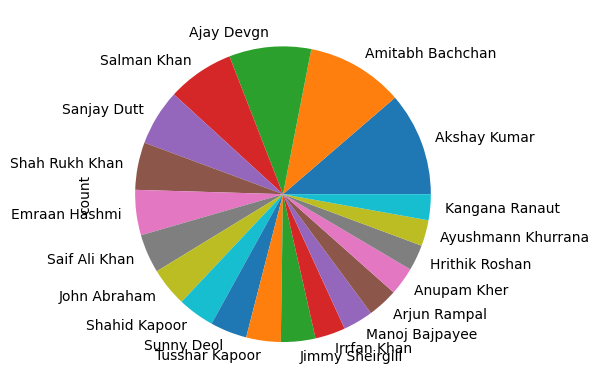

In [204]:
movies.value_counts().head(20).plot(kind='pie')

### Some Important Series Methods

In [205]:
# astype
# between
# clip
# drop_duplicates
# isnull
# dropna
# fillna
# isin
# apply
# copy

In [206]:
import numpy as np
import pandas as pd

In [207]:
sub

,Subscribers gained
0,48
1,57
2,40
3,43
4,44
...,...
360,231
361,226
362,155
363,144


In [208]:
vk

,runs
match_no,
1,1
2,23
3,13
4,12
5,1
...,...
211,0
212,20
213,73


In [209]:
# astype
import sys
sys.getsizeof(vk)

3472

In [210]:
vk.astype('int16')

,runs
match_no,
1,1
2,23
3,13
4,12
5,1
...,...
211,0
212,20
213,73


In [211]:
sys.getsizeof(vk.astype('int16'))

2182

In [212]:
# between
vk.between(50,99)

,runs
match_no,
1,False
2,False
3,False
4,False
5,False
...,...
211,False
212,False
213,True


In [213]:
vk[vk.between(50,99)]

,runs
match_no,
15,50
34,58
41,71
44,56
45,67
52,70
57,57
68,73
71,51


In [214]:
vk[vk.between(50,99)].size

45

In [215]:
# clip
sub

,Subscribers gained
0,48
1,57
2,40
3,43
4,44
...,...
360,231
361,226
362,155
363,144


In [216]:
sub.clip(100,200)

,Subscribers gained
0,100
1,100
2,100
3,100
4,100
...,...
360,200
361,200
362,155
363,144


In [217]:
# drop_duplicates
temp = pd.Series([1,1,1,2,3,4,5,7,3,5,3])
temp

,0
0,1
1,1
2,1
3,2
4,3
5,4
6,5
7,7
8,3
9,5


In [218]:
temp.drop_duplicates()

,0
0,1
3,2
4,3
5,4
6,5
7,7


In [219]:
temp.drop_duplicates(keep='last')

,0
2,1
3,2
5,4
7,7
9,5
10,3


In [220]:
temp.duplicated()
# tells whether data contain duplicate values or not

,0
0,False
1,True
2,True
3,False
4,False
5,False
6,False
7,False
8,True
9,True


In [221]:
movies.drop_duplicates()

,lead
movie,
Uri: The Surgical Strike,Vicky Kaushal
Battalion 609,Vicky Ahuja
The Accidental Prime Minister (film),Anupam Kher
Why Cheat India,Emraan Hashmi
Evening Shadows,Mona Ambegaonkar
...,...
Sssshhh...,Tanishaa Mukerji
Rules: Pyaar Ka Superhit Formula,Tanuja
Right Here Right Now (film),Ankit


In [222]:
temp = pd.Series([1,2,3,np.nan,5,6,np.nan,8,np.nan,10])
temp

,0
0,1.0
1,2.0
2,3.0
3,NaN
4,5.0
5,6.0
6,NaN
7,8.0
8,NaN
9,10.0


In [223]:
temp.size

10

In [224]:
temp.count()

np.int64(7)

In [225]:
#isnull
temp.isnull().sum()

np.int64(3)

In [226]:
# dropna
temp.dropna()

,0
0,1.0
1,2.0
2,3.0
4,5.0
5,6.0
7,8.0
9,10.0


In [227]:
# fillna
temp.fillna(0)

,0
0,1.0
1,2.0
2,3.0
3,0.0
4,5.0
5,6.0
6,0.0
7,8.0
8,0.0
9,10.0


In [228]:
temp.fillna(temp.mean())

,0
0,1.0
1,2.0
2,3.0
3,5.0
4,5.0
5,6.0
6,5.0
7,8.0
8,5.0
9,10.0


In [229]:
# isin.
vk


,runs
match_no,
1,1
2,23
3,13
4,12
5,1
...,...
211,0
212,20
213,73


In [230]:
(vk == 49) | (vk == 99)

,runs
match_no,
1,False
2,False
3,False
4,False
5,False
...,...
211,False
212,False
213,False


In [231]:
vk.isin([49,99])

,runs
match_no,
1,False
2,False
3,False
4,False
5,False
...,...
211,False
212,False
213,False


In [250]:
# apply
movies

,lead
movie,
Uri: The Surgical Strike,Vicky Kaushal
Battalion 609,Vicky Ahuja
The Accidental Prime Minister (film),Anupam Kher
Why Cheat India,Emraan Hashmi
Evening Shadows,Mona Ambegaonkar
...,...
Hum Tumhare Hain Sanam,Sushmita sen
Aankhen (2002 film),Amitabh Bachchan
Saathiya (film),Vivek Oberoi


In [254]:
movies.apply(lambda x:x.split()[0].upper())

,lead
movie,
Uri: The Surgical Strike,VICKY
Battalion 609,VICKY
The Accidental Prime Minister (film),ANUPAM
Why Cheat India,EMRAAN
Evening Shadows,MONA
...,...
Hum Tumhare Hain Sanam,SUSHMITA
Aankhen (2002 film),AMITABH
Saathiya (film),VIVEK


In [256]:
sub

,Subscribers gained
0,48
1,57
2,40
3,43
4,44
...,...
360,231
361,226
362,155
363,144


In [257]:
sub.mean()

np.float64(135.64383561643837)

In [259]:
sub.apply(lambda x:'good day' if x > sub.mean() else 'bad day')

,Subscribers gained
0,bad day
1,bad day
2,bad day
3,bad day
4,bad day
...,...
360,good day
361,good day
362,good day
363,good day


In [260]:
# copy
vk

,runs
match_no,
1,1
2,23
3,13
4,12
5,1
...,...
211,0
212,20
213,73


In [262]:
new = vk.head()

In [263]:
new

,runs
match_no,
1,1
2,23
3,13
4,12
5,1


In [267]:
new[2]=1
new

,runs
match_no,
1,1
2,1
3,13
4,12
5,1


In [268]:
vk
# permanent changes occurs here

,runs
match_no,
1,1
2,1
3,13
4,12
5,1
...,...
211,0
212,20
213,73


In [270]:
record = vk.head().copy()
record

,runs
match_no,
1,1
2,1
3,13
4,12
5,1


In [272]:
new[1] = 100
new

,runs
match_no,
1,100
2,1
3,13
4,12
5,1


In [273]:
vk.head()

,runs
match_no,
1,100
2,1
3,13
4,12
5,1
